## Self Organizing Map (SOM)
Realizaremos un ejercicio que consiste en un formulario de un banco rellenado por clientes que quieren acceder a una tarjeta de crédito. Nuestro objetivo es determinar la gente que ha mentido en dicho formulario.

Para ello vamos a tener una serie de puntos en el espacio 15 dimensiones que se corresponden al número de variables que vamos a utilizar (ver tabla abajo), y nosotros vamos a tener que fabricar una serie de nodos en ese espacio dimensional que serán la salida de la red neuronal. Se inicializará con una salida de pesos aleatorios del mismo tamaño o dimensión que el vector de datos y localizaremos la neurona que está más cerca de cada uno de los clientes y la actualizaremos para que esté todavía más cerca de ese cliente. Para ello aplicaremos una función de distancia o cercanía para actualizar dichos nodos. Al aplicar esto varias veces el espacio de salida irá perdiendo dimensiones hasta que la distancia entre las observaciones dejará de disminuir. La columna Class indica si la solicitud fue aprobada (1) o no (0)

### Recordemos los pasos para entrenar un SOM:

- <span style='color:#288c17'> <b>PASO 1:</span> Empezamos con un dataset compuesto de *n_features* variables independientes.

- <span style='color:#288c17'> <b>PASO 2:</span> Preparamos una parrilla compuesta de nodos, cada uno con un vector de pesos de *n_features* elementos.

- <span style='color:#288c17'> <b>PASO 3:</span> Aleatoriamente inicializamos valores del vector de pesos a números pequeños cercanos a $0$ (pero no $0$).

- <span style='color:#288c17'> <b>PASO 4:</span> Seleccionar una observación aleatoria del dataser.

- <span style='color:#288c17'> <b>PASO 5:</span> Calcular la distancia Euclídea desde dicho puntos a las diferentes neuronas de la red.

- <span style='color:#288c17'> <b>PASO 6:</span> Seleccionar la neurona con la menor distancia al punto. Dicha neurona es el nodo ganador.

- <span style='color:#288c17'> <b>PASO 7:</span> Actualizar lso epsos del nodo ganador para moverlo más cerca dle punto.

- <span style='color:#288c17'> <b>PASO 8:</span> Utilizar una función Gaussiana al vecindario del punto de medie el nodo ganador y actualizar los pesos de los vecinos para moverlos más cerca del punto. El radio de los vecinos afectados es la desviación típica de la Gaussiana.

- <span style='color:#288c17'> <b>PASO 9:</span> Repetir los pasos <span style='color:#288c17'> <b>1</span> a <span style='color:#288c17'> <b>5</span> y actualizar los pesos después de cada observación (*Reinforcement Learning*) o después de un conjunto de observaciones (*Batch Learning*), hasta que la red neuronal converja en un punto donde los vecindarios no cambien.

In [1]:
# Importar las librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importar el dataset
dataset = pd.read_csv("Credit_Card_Applications.csv")
X = dataset.iloc[:, :-1].values #datos que usaremos para las variables
y = dataset.iloc[:, -1].values # metemos la columna Class en el vector y, que sería como la predicción
dataset

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [8]:
# Escalado de características. Estandarizamos las varibales entre 0 y 1 (normalizamos)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [9]:
# Entrenar el SOM

#Para ello importamos minisom que se encuentra en nuestra carpeta. 
# Es un algoritmo pillado de internet para usar y mostrar SOMs.
# En el archivo se indica qué es cada variable
from minisom import MiniSom 

# - x,y son los cuadrados del SOM
# - input_len es la longitud de la entrada, en qué espacio vectorial empezamos a establecer als proyercciones
# - sigma es el radio incial 
# - learning_rate es la capacidad de ir adaptando la capacidad de los pesos
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X) #inicializamos los pesos aleatorios dandole los datos para entrenar (X)
som.train_random(data = X, num_iteration = 100)

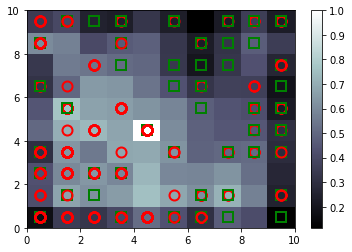

In [10]:
# Visualizar los resultados
from pylab import bone, pcolor, colorbar, plot, show

bone() #con bone establecemos la ventana de dibujo

# con pcolor() establecemos un gradiente que nos permita agregar los colores 
# de las distancias medias entre nuestras neuronas de forma automática (distance_map())
# esta función nos devuelve todas las distancias medias en forma matricial, la cual trasponemos
# con .T ya que vienen por fila y las queremos por columna
pcolor(som.distance_map().T) 

colorbar() #una leyenda de barra que nos indique la distancia media a los vecinos
markers = ['o', 's']
colors = ['r', 'g']

for i, x in enumerate(X): #i para la posicion y la x para los valores específicos de cada cliente
    w = som.winner(x) #nos dice dónde está los nodos ganadores
    plot(w[0]+0.5, w[1]+0.5, # posiciones x,y (el 0,0 está abajo la izquierda, por eso lo de +0.5 para que empiece en medio del tablero)
         markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = 'None', 
         markersize = 10, markeredgewidth = 2)
show()

Si nos fijamos en el mapa de arriba podemos detectar los fraudes que son los valores atipicos que no siguen las reglas generales, que serían los nodos que están más alejados del resto (celdas blancas).

Los circulos rojos son los clientes que no han obtenido aprobación y los cuadrados rojos los que no.

In [16]:
# Encontrar los fraudes
mappings = som.win_map(X) #nos devuelve los nodos ganadores de cada observación

#marcamos las coordenadas de las celdas blancas, si hubiera celdas blancas o muy blancas se podrían
#concatenar(este no es el caso pero lo hacemos para ver como se haría). 
frauds = sc.inverse_transform(frauds)
frauds = np.concatenate( (mappings[(4,4)], mappings[(7,8)]), axis = 0 )
#en fradus nos sale una lista con los clientes que están en ese nodo(o nodos) que supuestamente han 
#cometido fraude.